<a href="https://colab.research.google.com/github/cheesecakephobia/Kaggle_Natural-Language-Processing-with-Disaster-Tweets/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Kaggle/Natural Language Processing with Disaster Tweets/train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
train_df.fillna('none', inplace=True)

In [ ]:
train_df['target'].unique()

array([1, 0])

In [ ]:
train_df['keyword'].unique()

array(['none', 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', '

In [ ]:
dummies1 = pd.get_dummies(train_df[['keyword']], drop_first=True)
train_df = pd.concat([train_df.drop(['keyword'],axis=1), dummies1],axis=1)

In [ ]:
train_df.head()

,id,location,text,target,keyword_accident,keyword_aftershock,keyword_airplane%20accident,keyword_ambulance,keyword_annihilated,keyword_annihilation,keyword_apocalypse,keyword_armageddon,keyword_army,keyword_arson,keyword_arsonist,keyword_attack,keyword_attacked,keyword_avalanche,keyword_battle,keyword_bioterror,keyword_bioterrorism,keyword_blaze,keyword_blazing,keyword_bleeding,keyword_blew%20up,keyword_blight,keyword_blizzard,keyword_blood,keyword_bloody,keyword_blown%20up,keyword_body%20bag,keyword_body%20bagging,keyword_body%20bags,keyword_bomb,keyword_bombed,keyword_bombing,keyword_bridge%20collapse,keyword_buildings%20burning,keyword_buildings%20on%20fire,keyword_burned,...,keyword_snowstorm,keyword_storm,keyword_stretcher,keyword_structural%20failure,keyword_suicide%20bomb,keyword_suicide%20bomber,keyword_suicide%20bombing,keyword_sunk,keyword_survive,keyword_survived,keyword_survivors,keyword_terrorism,keyword_terrorist,keyword_threat,keyword_thunder,keyword_thunderstorm,keyword_tornado,keyword_tragedy,keyword_trapped,keyword_trauma,keyword_traumatised,keyword_trouble,keyword_tsunami,keyword_twister,keyword_typhoon,keyword_upheaval,keyword_violent%20storm,keyword_volcano,keyword_war%20zone,keyword_weapon,keyword_weapons,keyword_whirlwind,keyword_wild%20fires,keyword_wildfire,keyword_windstorm,keyword_wounded,keyword_wounds,keyword_wreck,keyword_wreckage,keyword_wrecked
0,1,none,Our Deeds are the Reason of this #earthquake M...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,none,Forest fire near La Ronge Sask. Canada,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,none,All residents asked to 'shelter in place' are ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,none,"13,000 people receive #wildfires evacuation or...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,none,Just got sent this photo from Ruby #Alaska as ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train_df.drop(['id','location','target','text'], axis=1)

In [ ]:
y = train_df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 3)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
input_shape = X_train.shape[1]
input_shape

221

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(221, input_dim = input_shape, activation= 'relu'))
model.add(Dropout(.2))
model.add(Dense(190, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(160, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(130, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(70, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(40, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(.2))

In [ ]:
model.add(Dense(1, activation= 'sigmoid'))

In [ ]:
model.compile(loss = 'bce', optimizer= 'adam')

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 50)

Epoch 1/50
179/179 [==============================] - 3s 8ms/step - loss: 0.5992 - val_loss: 0.5559
Epoch 2/50
179/179 [==============================] - 1s 7ms/step - loss: 0.5589 - val_loss: 0.5505
Epoch 3/50
179/179 [==============================] - 1s 7ms/step - loss: 0.5481 - val_loss: 0.5528
Epoch 4/50
179/179 [==============================] - 1s 7ms/step - loss: 0.5445 - val_loss: 0.5537
Epoch 5/50
179/179 [==============================] - 1s 7ms/step - loss: 0.5414 - val_loss: 0.5625
Epoch 6/50
179/179 [==============================] - 1s 7ms/step - loss: 0.5439 - val_loss: 0.5632
Epoch 7/50
179/179 [==============================] - 1s 7ms/step - loss: 0.5445 - val_loss: 0.5464
Epoch 8/50
179/179 [==============================] - 1s 7ms/step - loss: 0.5426 - val_loss: 0.5520
Epoch 9/50
179/179 [==============================] - 1s 7ms/step - loss: 0.5420 - val_loss: 0.5551
Epoch 10/50
179/179 [==============================] - 1s 7ms/step - loss: 0.5450 - val_loss: 0.5508

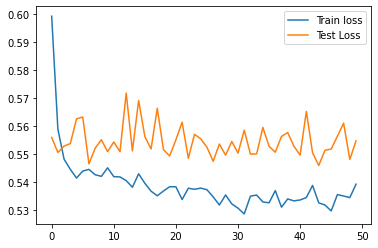

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();